# Bank Marketing Analysis

### Libraries

In [30]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings(action="ignore")

### Read Dataset

##### Context

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

##### Attribute Information:

##### About client features:
- age
- job (type of job)
- marital (marital status)
- education
- default (has credit in default? 'no','yes','unknown')
- balance
- housing (has housing loan?'no','yes','unknown')
- loan (has personal loan?'no','yes','unknown')

##### About current campaign:
- contact (communication type: 'cellular','telephone')
- duration (last contact duration, in seconds) Important note: the duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- day (last contact day of the week)
- month (last contact month of year)
- campaign (number of contacts performed during this campaign and for this client)
- deposit (has the client subscribed a term deposit?'yes','no')

##### About previous contacts/campaign:
- pdays (number of days that passed by after the client was last contacted from a previous campaign, 999 means client was not previously contacted)
- previous (number of contacts performed before this campaign and for this client)
- poutcome (outcome of the previous marketing campaign: 'failure','nonexistent','success')

In [2]:
bank_data = pd.read_csv('bank.csv')
df = bank_data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Variable Analysis

#### Categorical Variable

In [3]:
def bar_plot(variable):
    var =df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

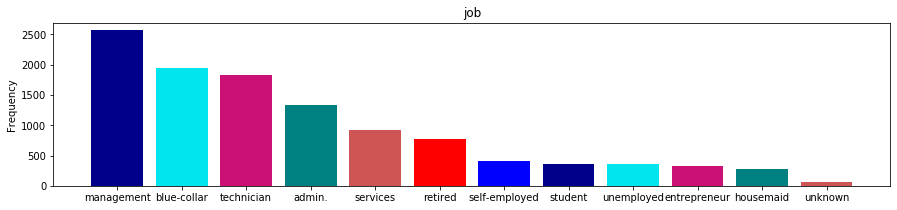

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


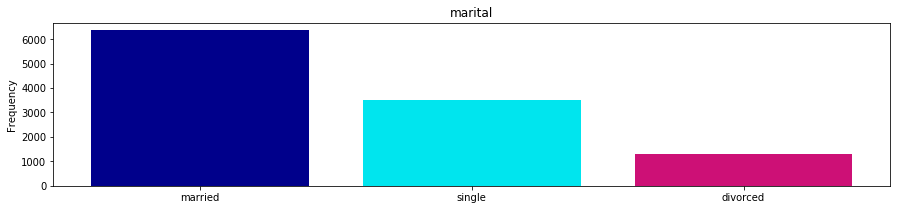

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


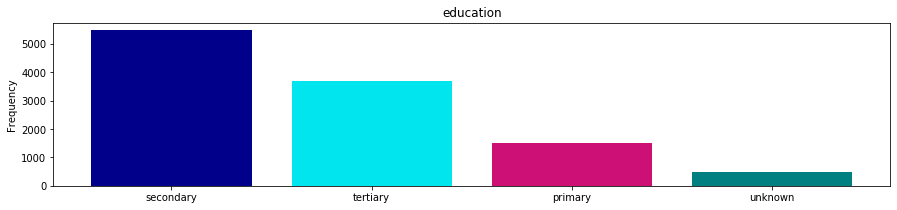

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


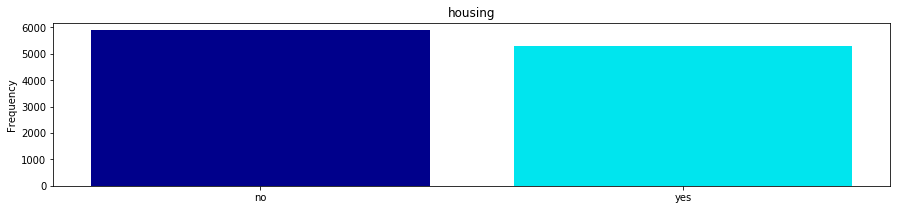

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


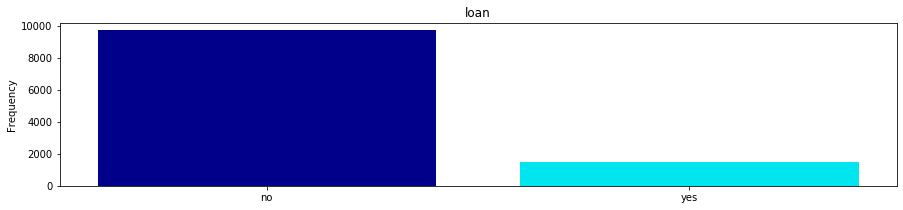

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


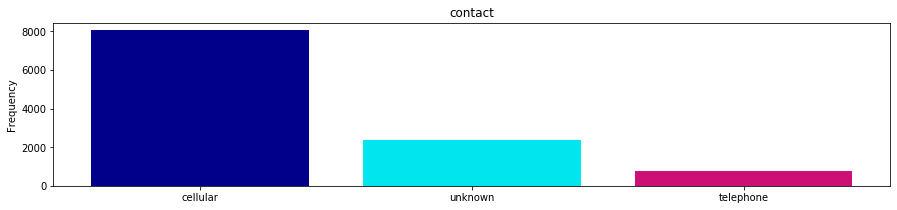

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


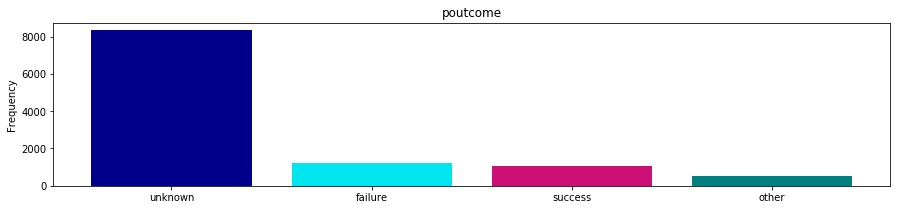

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


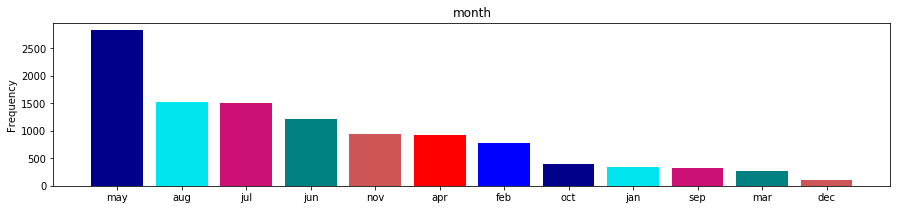

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


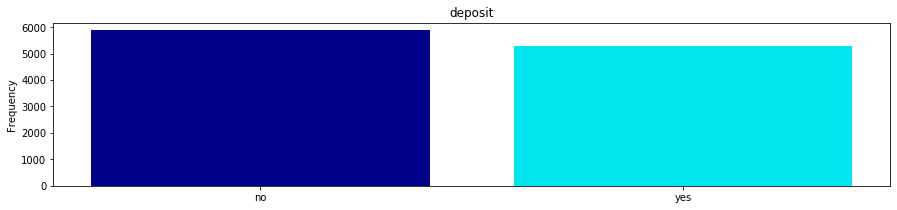

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [4]:
categoryc = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit"]
for c in categoryc:
    bar_plot(c)

#### Numerical Variable

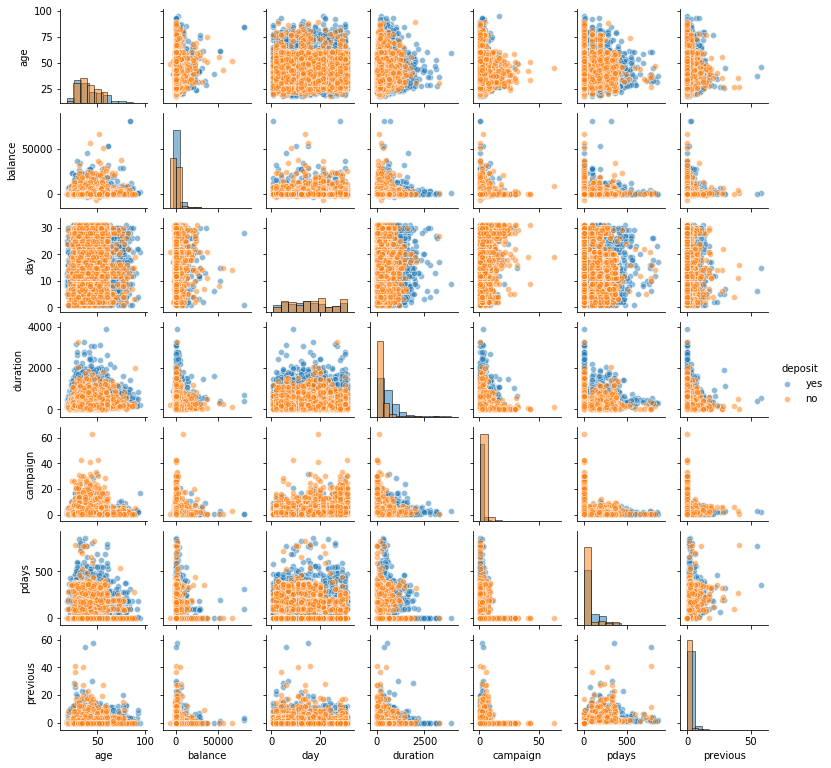

In [5]:
sns.pairplot(df, diag_kind='hist',  hue= 'deposit', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

### Outlier Detection

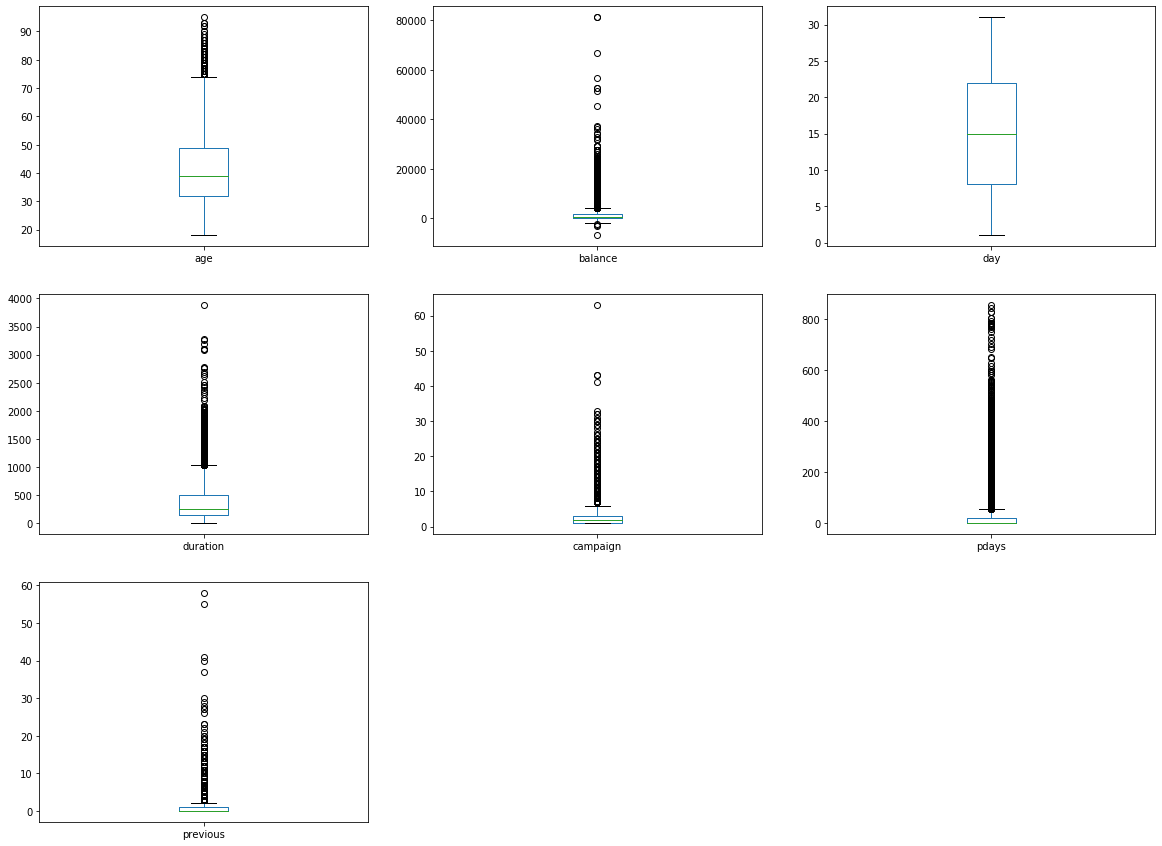

In [6]:
df.plot(kind='box',figsize=(20,15),subplots=True,layout=(3,3))
plt.show()

In [7]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [8]:
df = df.drop([3945], axis=0)

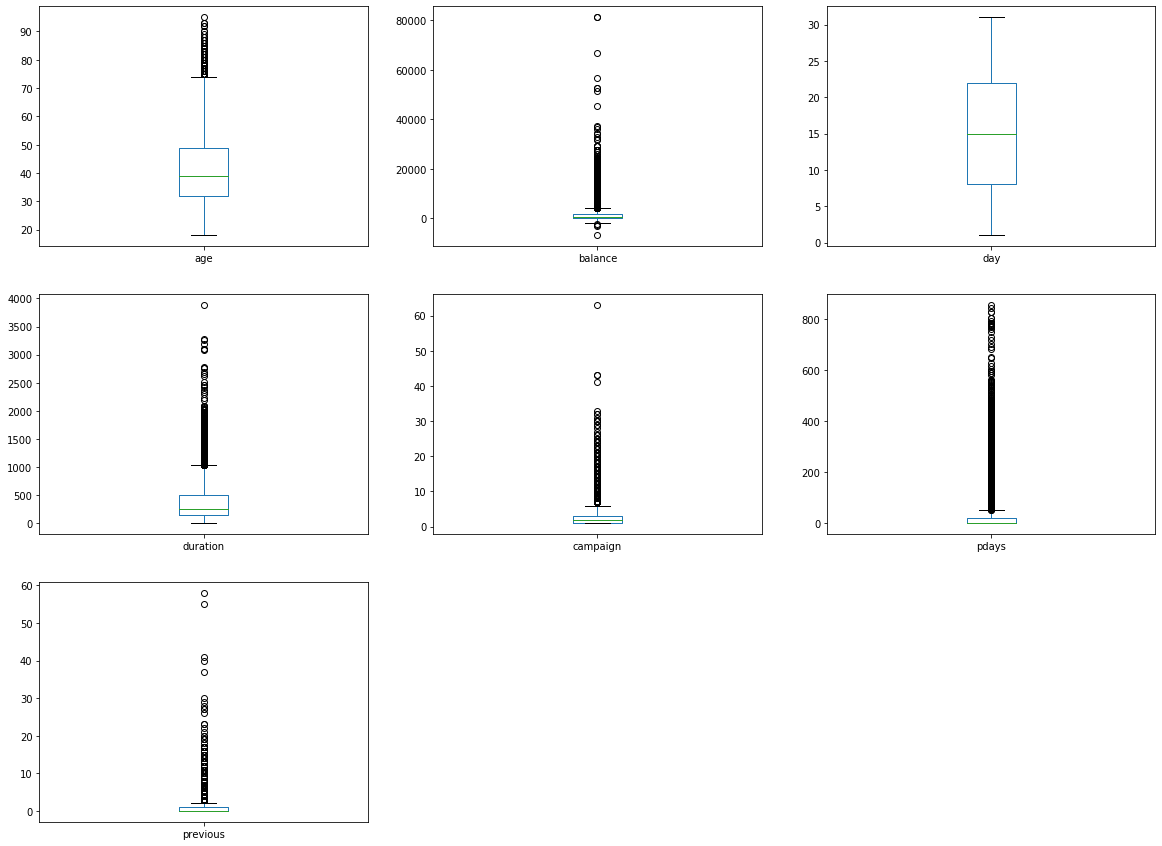

In [9]:
df.plot(kind='box',figsize=(20,15),subplots=True,layout=(3,3))
plt.show()

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
cat=df.select_dtypes(include='object')
numeric=df.select_dtypes(exclude='object')

In [12]:
for i in numeric:
    df[i]=df[i].fillna(df[i].mean())

In [13]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Correlation Matrix

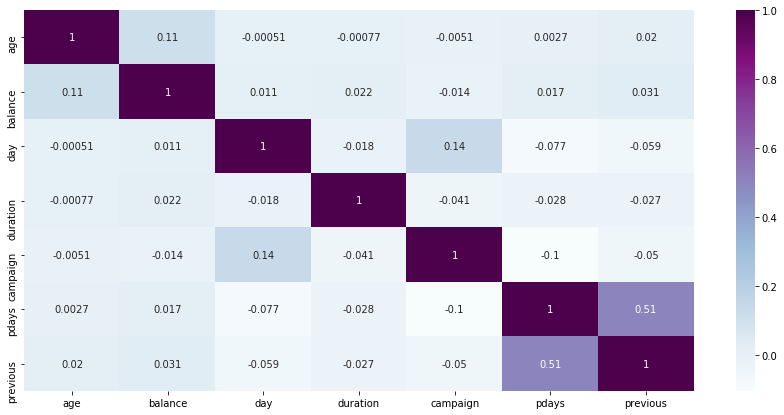

In [14]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='BuPu');

### Data Manipulation

In [15]:
df=df.drop(['duration'],axis=1)

* I do not include 'duration' in the data.

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


### One-Hot Encoding

In [17]:
columns=df.select_dtypes(include=[object]).columns
df=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
df=df.drop(['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 11161
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11161 non-null  int64 
 1   balance              11161 non-null  int64 
 2   campaign             11161 non-null  int64 
 3   pdays                11161 non-null  int64 
 4   previous             11161 non-null  int64 
 5   deposit              11161 non-null  object
 6   job_admin.           11161 non-null  uint8 
 7   job_blue-collar      11161 non-null  uint8 
 8   job_entrepreneur     11161 non-null  uint8 
 9   job_housemaid        11161 non-null  uint8 
 10  job_management       11161 non-null  uint8 
 11  job_retired          11161 non-null  uint8 
 12  job_self-employed    11161 non-null  uint8 
 13  job_services         11161 non-null  uint8 
 14  job_student          11161 non-null  uint8 
 15  job_technician       11161 non-null  uint8 
 16  job_

,age,balance,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [18]:
def pdayswork(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
df['pdays2'] = df['pdays'].apply(pdayswork)

In [19]:
df=df.drop(['deposit_no', 'deposit_yes'],axis=1)

In [20]:
def deposit1(deposit):
    if(deposit=='yes'):
        return(1)
    elif(deposit=='no'):
        return(0)
df['depositNew'] = df['deposit'].apply(deposit1)

In [21]:
df=df.drop(['deposit'],axis=1)

In [22]:
df.head()

,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays2,depositNew
0,59,2343,1,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11161 non-null  int64
 1   balance              11161 non-null  int64
 2   campaign             11161 non-null  int64
 3   pdays                11161 non-null  int64
 4   previous             11161 non-null  int64
 5   job_admin.           11161 non-null  uint8
 6   job_blue-collar      11161 non-null  uint8
 7   job_entrepreneur     11161 non-null  uint8
 8   job_housemaid        11161 non-null  uint8
 9   job_management       11161 non-null  uint8
 10  job_retired          11161 non-null  uint8
 11  job_self-employed    11161 non-null  uint8
 12  job_services         11161 non-null  uint8
 13  job_student          11161 non-null  uint8
 14  job_technician       11161 non-null  uint8
 15  job_unemployed       11161 non-null  uint8
 16  job_unknown          1

### Data Normalization

In [24]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 0:50]
Y = df.iloc[:, 50]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)

[[ 1.4926218   0.25261499 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [ 1.24065834 -0.4598839  -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [-0.01915895 -0.08007052 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 ...
 [-0.77504932 -0.46484473 -0.18682923 ... -0.32579855  0.58352347
  -0.58379938]
 [ 0.14881669 -0.47383623 -0.18682923 ... -0.32579855 -1.71372713
   1.71291719]
 [-0.60707368 -0.47383623 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]]


## Model Building

### Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.30, 
                                                    random_state=42)
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [26]:
nb_model.predict(X_test)[0:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [27]:
nb_model.predict_proba(X_test)[0:10]

array([[9.93278600e-01, 6.72139989e-03],
       [2.81416928e-01, 7.18583072e-01],
       [9.64671412e-01, 3.53285883e-02],
       [9.99971359e-01, 2.86408127e-05],
       [9.87538339e-02, 9.01246166e-01],
       [1.05180334e-13, 1.00000000e+00],
       [9.99999952e-01, 4.80511107e-08],
       [6.80754052e-04, 9.99319246e-01],
       [1.27914699e-03, 9.98720853e-01],
       [9.99999997e-01, 3.30091715e-09]])

In [28]:
y_pred = nb_model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.6751269035532995

In [32]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.6739261774957548

### KNN

#### Model & Predict

In [33]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [34]:
y_pred = knn_model.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.6796058524932815

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1729
           1       0.69      0.62      0.65      1620

    accuracy                           0.68      3349
   macro avg       0.68      0.68      0.68      3349
weighted avg       0.68      0.68      0.68      3349



#### Model Tuning

In [37]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [38]:
print("Best score: " + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

Best score: 0.7036639039070507
The best parameters: {'n_neighbors': 49}


In [39]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [40]:
knn_tuned.score(X_test, y_test)

0.6981188414452075

In [41]:
y_pred = knn_tuned.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.6981188414452075

### SVC

#### Model & Tahmin

In [43]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(kernel='linear')

In [44]:
y_pred = svm_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.669752164825321

#### Model Tuning

In [46]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [47]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 1}


In [48]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [49]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.669752164825321

### Artificial Neural Networks

In [50]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

In [53]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled[0:5]

array([[ 1.25451733,  0.49892334, -0.18397357, -0.47428038, -0.37688746,
        -0.36805586, -0.45707073, -0.16742164, -0.16416109,  1.81252424,
        -0.27032744, -0.19984019, -0.29948577, -0.18294818, -0.43769879,
        -0.18257419, -0.08264852, -0.35811949,  0.87397329, -0.68501794,
        -0.39513843, -0.96576735,  1.40127841, -0.21689775,  0.12384113,
        -0.12384113, -1.06454709,  1.06454709,  0.39057954, -0.39057954,
         0.61958013, -0.26896175, -0.51547661, -0.29309541,  2.51152628,
        -0.08944272, -0.27654635, -0.17220915, -0.39751675, -0.34895429,
        -0.16042224, -0.58661369, -0.30778392, -0.19101483, -0.17102342,
        -0.35240677, -0.21527523, -0.32347799,  0.57656194, -0.57675902],
       [-0.09858816, -0.20286027,  0.1791395 ,  1.17226487,  2.44642545,
         2.71697888, -0.45707073, -0.16742164, -0.16416109, -0.55171676,
        -0.27032744, -0.19984019, -0.29948577, -0.18294818, -0.43769879,
        -0.18257419, -0.08264852, -0.35811949, -1.

In [54]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [55]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7025977903851897

#### Model Tuning

In [56]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [59]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [60]:
print("The best parameters:  " + str(mlpc_cv_model.best_params_))

The best parameters:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [61]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [62]:
mlpc_tuned.fit(X_train_scaled, y_train)

y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7058823529411765

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [64]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7160346372051358

#### Model Tuning

In [65]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [66]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [67]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [68]:
print("The best parameters:  " + str(rf_cv_model.best_params_))

The best parameters:  {'max_depth': 10, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [69]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [70]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7267841146610928

### Gradient Boosting Machines

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [74]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.728277097641087

#### Model Tuning

In [75]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [76]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [77]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [78]:
print("The best parameters:  " + str(gbm_cv.best_params_))

The best parameters:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [79]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [80]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [81]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7261869214690952